In [28]:
import pandas as pd
import seaborn as sbn
import numpy as np

In [29]:
dataFrame = pd.read_excel("C:/Users/Muhammet Sait/Desktop/bisiklet_fiyatlari.xlsx")

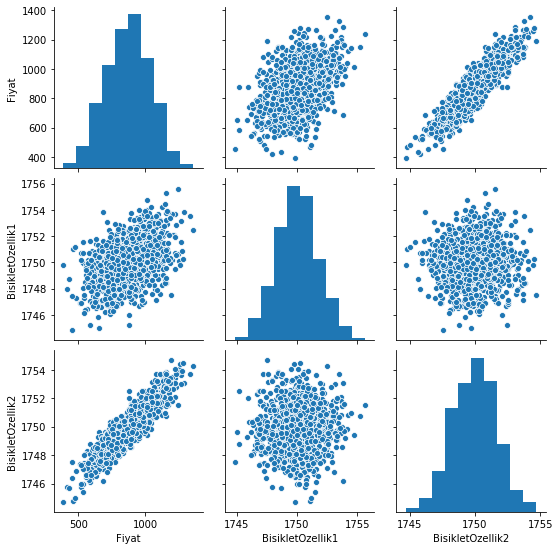

In [30]:
sbn.pairplot(dataFrame)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
y = dataFrame["Fiyat"].values
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [33]:
x_train.shape

(670, 2)

In [34]:
x_test.shape

(330, 2)

In [35]:
#buraya kadar olan kısımda veriyi okuduk ve test için %33 olacak şekilde böldük.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [39]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [40]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [41]:
#verileri normalize ettik. 0 ve 1 aralığında kendi değerlerine uygun olacak şekilde ölçeklendi.

In [42]:
import tensorflow as tf

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
model = Sequential()

model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop",loss="mse")

In [45]:
#nöronların olduğu model oluşturuldu.

In [46]:
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
670/670 [==============================] - 0s 271us/sample - loss: 795805.6496
Epoch 2/250
670/670 [==============================] - 0s 32us/sample - loss: 795534.7450
Epoch 3/250
670/670 [==============================] - 0s 35us/sample - loss: 795281.0843
Epoch 4/250
670/670 [==============================] - 0s 34us/sample - loss: 795025.8931
Epoch 5/250
670/670 [==============================] - 0s 36us/sample - loss: 794754.3334
Epoch 6/250
670/670 [==============================] - 0s 31us/sample - loss: 794452.5875
Epoch 7/250
670/670 [==============================] - 0s 31us/sample - loss: 794109.5647
Epoch 8/250
670/670 [==============================] - 0s 34us/sample - loss: 793711.8358
Epoch 9/250
670/670 [==============================] - 0s 31us/sample - loss: 793253.5190
Epoch 10/250
670/670 [==============================] - 0s 31us/sample - loss: 792725.4823
Epoch 11/250
670/670 [==============================] - 0s 33us/sample - loss: 792118.8082
Epoch 1

670/670 [==============================] - 0s 30us/sample - loss: 591.2801
Epoch 183/250
670/670 [==============================] - 0s 29us/sample - loss: 558.1620
Epoch 184/250
670/670 [==============================] - 0s 33us/sample - loss: 520.0769
Epoch 185/250
670/670 [==============================] - 0s 30us/sample - loss: 481.2888
Epoch 186/250
670/670 [==============================] - 0s 31us/sample - loss: 445.1515
Epoch 187/250
670/670 [==============================] - 0s 34us/sample - loss: 408.9940
Epoch 188/250
670/670 [==============================] - 0s 30us/sample - loss: 380.9806
Epoch 189/250
670/670 [==============================] - 0s 30us/sample - loss: 350.4102
Epoch 190/250
670/670 [==============================] - 0s 33us/sample - loss: 322.7053
Epoch 191/250
670/670 [==============================] - 0s 31us/sample - loss: 296.7010
Epoch 192/250
670/670 [==============================] - 0s 33us/sample - loss: 275.8740
Epoch 193/250
670/670 [============

In [47]:
loss = model.history.history["loss"]

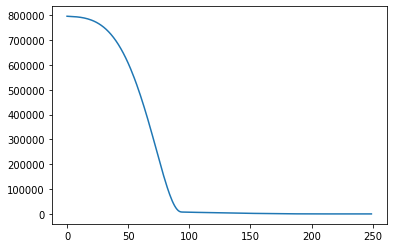

In [48]:
sbn.lineplot(x=range(len(loss)),y = loss)

In [49]:
trainLoss = model.evaluate(x_train,y_train, verbose=0)

In [50]:
testLoss = model.evaluate(x_test,y_test, verbose=0)

In [51]:
trainLoss

73.17461719797619

In [52]:
testLoss

78.27480982000178

In [53]:
testTahminleri = model.predict(x_test)

In [56]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [57]:
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [60]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [61]:
testTahminleri

0      1077.314331
1       623.322083
2       875.610352
3       893.773193
4       899.042114
          ...     
325    1013.065186
326     790.348877
327     765.455444
328    1167.101685
329     802.302246
Length: 330, dtype: float32

In [62]:
tahminDf = pd.concat([tahminDf,testTahminleri],axis=1)

In [63]:
tahminDf

,Gerçek Y,0
0,1081.652164,1077.314331
1,622.675990,623.322083
2,889.356810,875.610352
3,902.826733,893.773193
4,897.662404,899.042114
...,...,...
325,1028.438035,1013.065186
326,789.934950,790.348877
327,758.490486,765.455444
328,1172.871659,1167.101685


In [64]:
tahminDf.columns=["Gerçek Y","Tahmin Y"]

In [65]:
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1077.314331
1,622.675990,623.322083
2,889.356810,875.610352
3,902.826733,893.773193
4,897.662404,899.042114
...,...,...
325,1028.438035,1013.065186
326,789.934950,790.348877
327,758.490486,765.455444
328,1172.871659,1167.101685


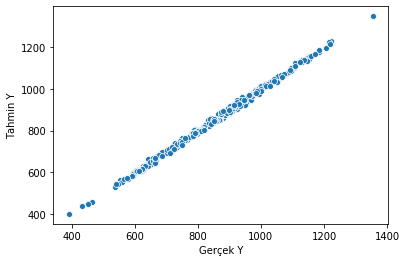

In [67]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data = tahminDf)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
mean_absolute_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

7.0889881958262295

In [70]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038
